In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Machine Learning\Datasets\Iris.csv")

In [4]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor


In [5]:
del data['Id']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*The data is an outliers free.

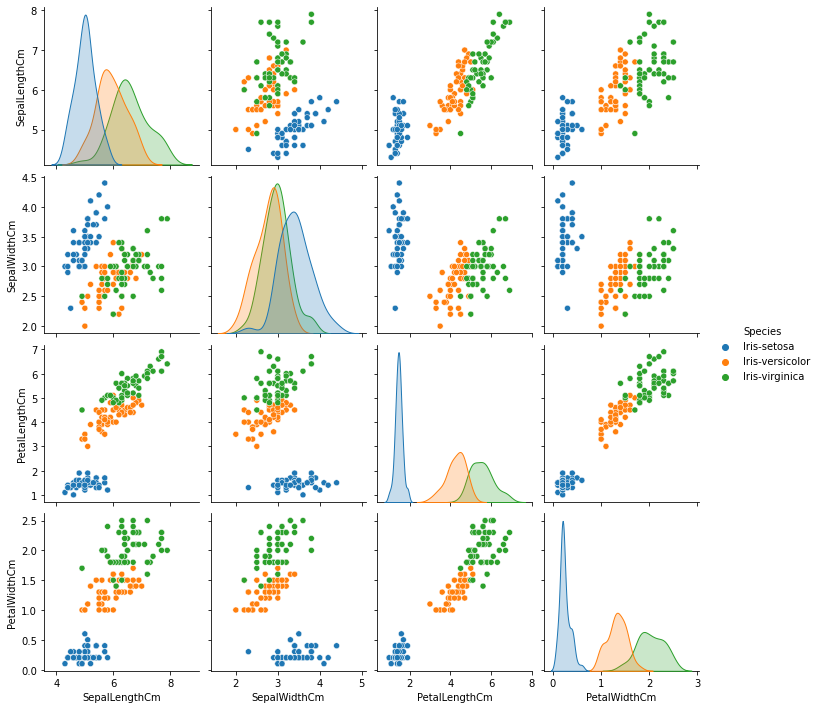

In [9]:
sns.pairplot(data,hue='Species')

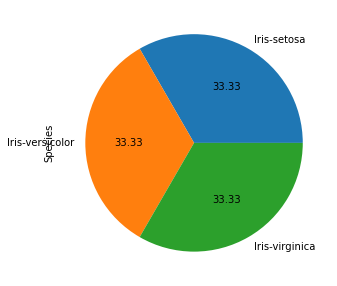

In [10]:
plt.figure(figsize=(10,5))
data['Species'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [11]:
x=data.drop(columns=['Species'])
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=data['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
print(x_train.shape)

(120, 4)


In [15]:
print(x_test.shape)

(30, 4)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [17]:
dt1=dt.fit(x_train,y_train)
dt1

DecisionTreeClassifier()

In [18]:
y_pred=dt.predict(x_test)

In [19]:
from sklearn import tree

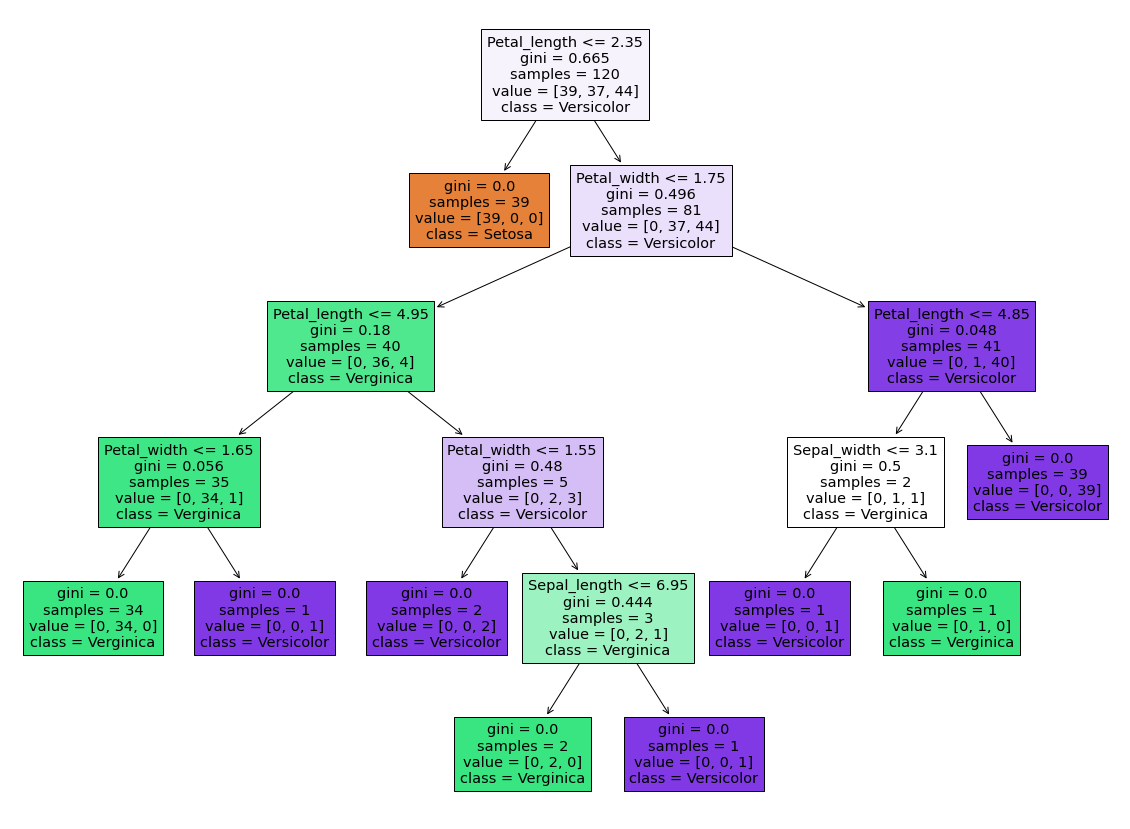

In [20]:
plt.figure(figsize=(20,15))
t=tree.plot_tree(dt1,feature_names=['Sepal_length','Sepal_width','Petal_length','Petal_width'],
                class_names=['Setosa','Verginica','Versicolor'],filled=True)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
print(accuracy_score(y_test,y_pred))

1.0


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

